# Laptop Price Prediction Project

In this project, we have a dataset that contain laptop's features with their prices.

We want to build a linear regression model that predicts laptop prices.

In order to obtain this we will:
1. Load our data and prepare
2. Clean our data
3. Make an exploratory data analysis
4. Build a model

## STAGE 1: Data Loading and Preperation

Firstly, let's import necessary libraries.

In [2022]:
import numpy as np
import pandas as pd

Since, the data is in csv format, we will convert it into dataframe by using pandas read_csv function, and check its first 5 elements.

In [2025]:
df = pd.read_csv("laptop_pricing_dataset_base.csv")
df.head()

,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6.1,978
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


As we see, there are no headers, so function made first row headers. To fix it, we will:

In [2028]:
df = pd.read_csv("laptop_pricing_dataset_base.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Problem solved, but we need headers to identify the features. Therefore we will add headers to our dataframe

In [2031]:
# Here is the headers according to our dataset
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = headers
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Next thing, we will look dataset summary to check if there are NaN values

In [2034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  238 non-null    object 
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       238 non-null    object 
 11  Price           238 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.4+ KB


It looks like if there are missing values, they are not stand as NaN values. Therefore, we will check whether there are "?" in our dataset.

In [2037]:
# Count the number of "?" values in each column
print((df == '?').sum())

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64


As we see, we have "?" values for the missing values. Now, we want to convert them into NaN values in order to fill them easily in the next step.

In [2040]:
df.replace('?',np.nan, inplace = True)
print((df == '?').sum())

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64


Now, our dataset is ready for data wrangling.

## STAGE 2: Data Wrangling

In this stage we will:
* Handle missing data in different ways
* Convert categorical data into numerical indicator variables
* Prepare our data to be ready for EDA

Firstly, we can update the Screen_Size_cm column such that all values are rounded to nearest 2 decimal places

In [2046]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


As a next step we can deal with missing data. Wew saw that there are missing data in two columns: Screen_Size_inch and Weight_kg.

When we are dealing with Weight_kg, we can replace missing data with the average of that column since the "Weight_kg" attributes are continuous in nature.

However, when it comes to Screen_Size_inch, even if it looks like there are continuous values in the column, the "Screen_Size_cm" attributes are categorical in nature. Therefore, we will write a code to replace the missing values of Screen Size with the most frequent value of the attribute.

In [2051]:
# Dealing with Weight_kg
mean_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, mean_weight, inplace=True)

# Dealing with Screen_Size_cm
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

C:\Users\Ozan\AppData\Local\Temp\ipykernel_4360\3608204226.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight_kg"].replace(np.nan, mean_weight, inplace=True)
C:\Users\Ozan\AppData\Local\Temp\ipykernel_4360\3608204226.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Now, let's check our data types, since we want our continuos numbers to be numeric.

In [2054]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm     object
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg          object
Price               int64
dtype: object

Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". To fix that:

In [2057]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

As a next step, we will make data standardization by making Screen_Size_cm turn into Screen_Size_inch since The value of Screen_size usually has a standard unit of inches.

In [2060]:
inch = 2.54

df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

Since it contains categorical values, we want to convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [2063]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [2065]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,1.6,8,256,1.60,978,False,True
1,Dell,3,1,1,3,15.6,2.0,4,256,2.20,634,True,False
2,Dell,3,1,1,7,15.6,2.7,8,256,2.20,946,True,False
3,Dell,4,2,1,5,13.3,1.6,8,128,1.22,1244,False,True
4,HP,4,2,1,7,15.6,1.8,8,256,1.91,837,True,False


For now, dataframe is ready for EDA

## STAGE 3: Exploratory Data Analysis

Now, we will mostly create plots with different features to investigate the relationship between them.

But before creating plots, since they contain continous values, we want to check correlation of CPU_frequency, Weight_pounds and Price

In [2071]:
for i in ["CPU_frequency", "Weight_kg"]:
    print(f"Correlation of Price and {i} is ", df[[i,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Weight_kg is             Weight_kg     Price
Weight_kg   1.000000 -0.050312
Price      -0.050312  1.000000


Interpretation:
From these results, we interpret that CPU_frequency has a 36% positive correlation with the price of the laptops, while the other parameter has weak correlation with price.

Let's create the plot to see that relation

In [2075]:
# First import the necessary tools
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 3974.15)

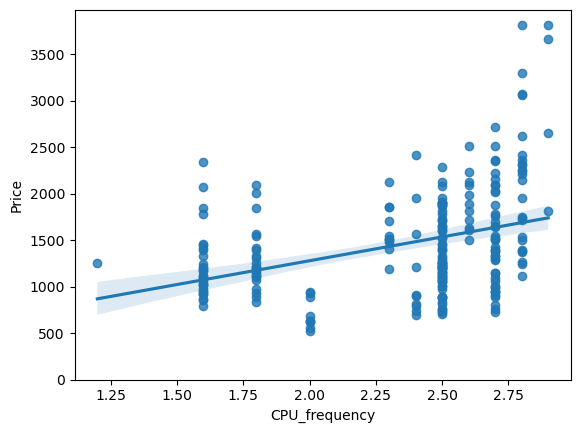

In [2077]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

Now, we want to generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD", and "Screen_Size_inch".

<Axes: xlabel='Category', ylabel='Price'>

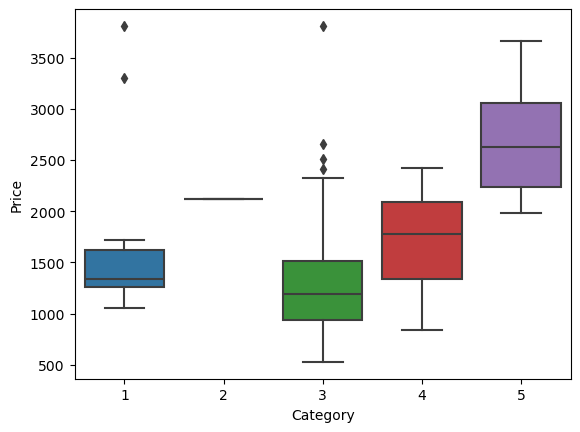

In [2080]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

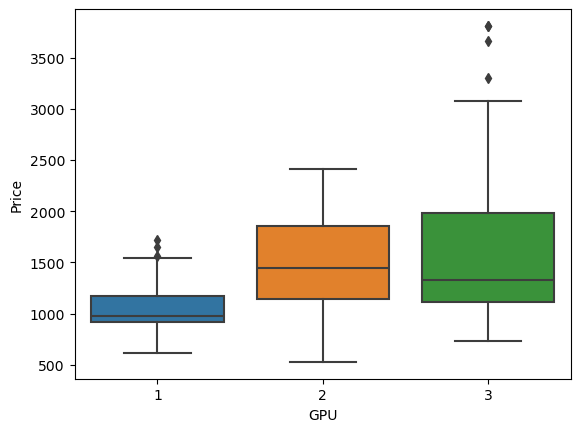

In [2081]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

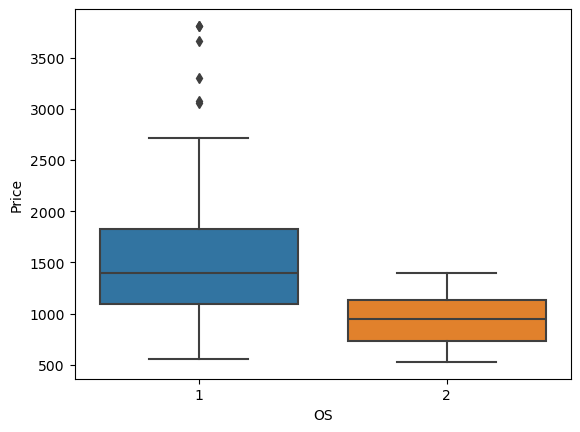

In [2083]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

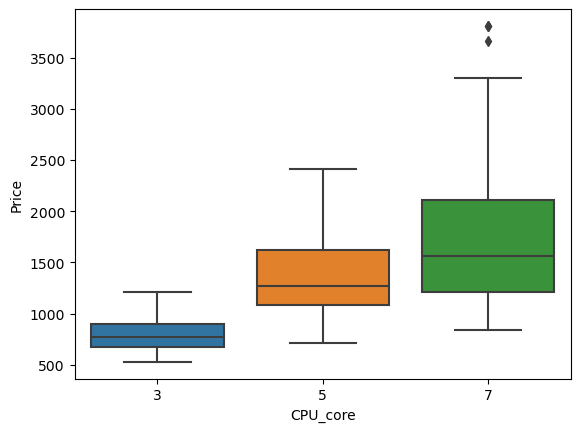

In [2085]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

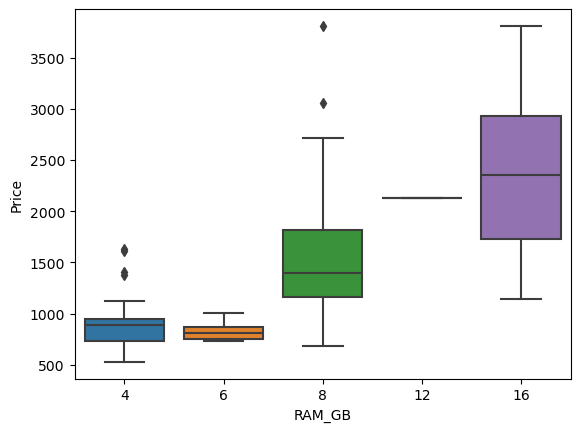

In [2088]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

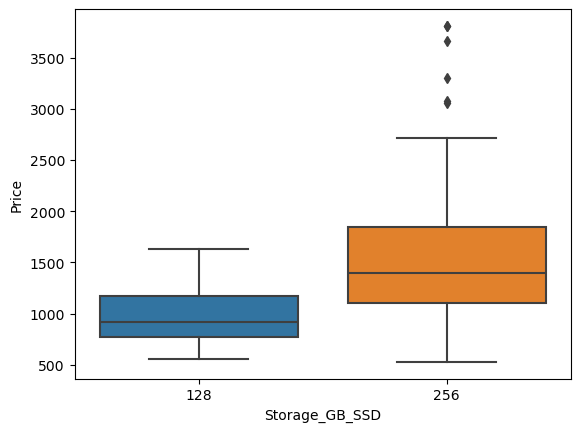

In [2090]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

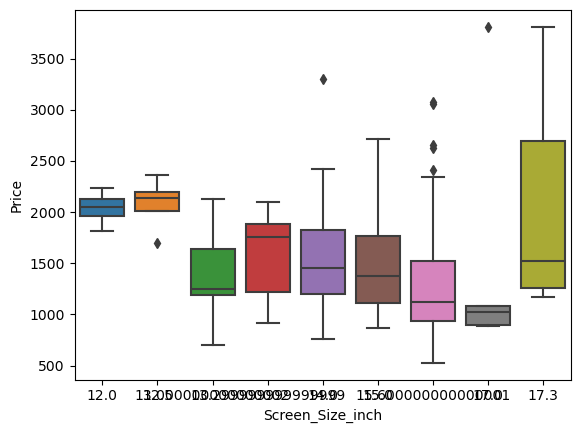

In [2092]:
sns.boxplot(x="Screen_Size_inch", y="Price", data=df)

Interpretations:
* Laptops in category 5 are more expensive
* OS: when OS=1, laptops are more expensive
* As CPU_core increases, GPU increases, RAM increases, price increases
* 256 GB storage laptops are more expensive than 128 GB ones

Finally, we will use scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help us determine the parameters most likely to have a strong effect on the price of the laptops.

In [2096]:
# Let's import libraries
from scipy import stats

for parameter in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_kg','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[parameter], df['Price'])
    print(parameter)
    print("The Pearson Correlation Coefficient for ",parameter," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713296e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118281  with a P-value of P = 0.08853397846830759
Weight_kg
The Pearson Correlation Coefficient for  Weight_kg  is -0.050312258377515406  with a P-value of P = 0.4397693853433913
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559246759
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  with a P-

**From these, we can say that Screen Size and Weight have weak relation with price. We can use others to build our linear regression model in next section**

## STAGE 4: Modelling

In [2100]:
# First let's import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2102]:
feature = df[['RAM_GB','CPU_frequency','Storage_GB_SSD','CPU_core','OS','GPU','Category','Price']]
feature.head()

,RAM_GB,CPU_frequency,Storage_GB_SSD,CPU_core,OS,GPU,Category,Price
0,8,1.6,256,5,1,2,4,978
1,4,2.0,256,3,1,1,3,634
2,8,2.7,256,7,1,1,3,946
3,8,1.6,128,5,1,2,4,1244
4,8,1.8,256,7,1,2,4,837


In [2104]:
feature = feature.astype('float64')
feature.head()

,RAM_GB,CPU_frequency,Storage_GB_SSD,CPU_core,OS,GPU,Category,Price
0,8.0,1.6,256.0,5.0,1.0,2.0,4.0,978.0
1,4.0,2.0,256.0,3.0,1.0,1.0,3.0,634.0
2,8.0,2.7,256.0,7.0,1.0,1.0,3.0,946.0
3,8.0,1.6,128.0,5.0,1.0,2.0,4.0,1244.0
4,8.0,1.8,256.0,7.0,1.0,2.0,4.0,837.0


Since we are using all features except Screen Size and Weight, we will implement multiple regression

In [2107]:
# First, we create a regression object
lm1 = LinearRegression()
# Next, we define our parameters and assign them to X
X = feature.drop(['Price'],axis=1)
# We define our target and assign it to Y
Y = feature['Price']
# Then we split our data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
# Let's fit our training data now and check our score on the test data
lm1.fit(x_train, y_train)

# To check our accuracy
print("Accuracy on training data: ", lm1.score(x_train, y_train))
print("Accuracy on test data: ", lm1.score(x_test, y_test))

Accuracy on training data:  0.5257296007782036
Accuracy on test data:  0.40271445393150596


We can try to increase our accuracy, so we will try to **evaluate** our model.

We can apply Rigid Regression, polynomization and standardization to evaluate our model.

In order to do that we want to create GridSearch to find best parameters for our purpose.

In [2114]:
# Here, we are defining our dictionary that contains possible values of polynomial degree and possible values of alpha in ridge regression. 
param_grid = {
    'poly__degree': [2, 3, 4, 5],            
    'ridge__alpha': [0.0001,0.001,0.01, 0.1, 1, 10,100,1000]     
}

# Here, we are creating a pipeline which will apply polynomization, standardization and ridge regression.
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),         
    ('scaler', StandardScaler()),         
    ('ridge', Ridge())                     
])
# Creating ridge object
RR=Ridge()
# Creating GridSearch object
Grid1 = GridSearchCV(pipeline, param_grid,cv=5)
# Now the rest is fitting the model
Grid1.fit(x_train, y_train)
BestRR=Grid1.best_estimator_
print("Our best parameters: ", Grid1.best_params_)
print("Accuracy on train data: ", BestRR.score(x_train, y_train))
print("Accuracy on test data: ", BestRR.score(x_test, y_test))

Our best parameters:  {'poly__degree': 4, 'ridge__alpha': 100}
Accuracy on train data:  0.616515284426262
Accuracy on test data:  0.4850344659154384


Since our dataset is small, we could not find very high accuracy results, but we increased our accuracy by finding optimal parameters.

Let's try to create a GridSearch object, but this time it will be with Support Vector Regression instead of Ridge Regression.

In [2118]:
# Import necessary libraries
from sklearn.svm import SVR

# Let's create a pipeline with PolynomialFeatures, StandardScaler, and SVR
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),        
    ('scaler', StandardScaler()),          
    ('svr', SVR())                        
])

# let's efine the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],            
    'svr__kernel': ['linear', 'rbf'],      
    'svr__C': [0.01, 0.1, 1, 10, 100, 1000],           
    'svr__epsilon': [0.01, 0.1, 1, 10],       
    'svr__gamma': ['scale', 'auto']      
}

# We create GridSearchCV with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fiting GridSearchCV
grid_search.fit(x_train, y_train)

# Getting the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

print("Accuracy on train data: ", best_model.score(x_train, y_train))
print("Accuracy on test data: ", best_model.score(x_test, y_test))

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters: {'poly__degree': 3, 'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Accuracy on train data:  0.5750541475677269
Accuracy on test data:  0.5104453681058823


We see that SVR showed worse accuracy on training data, but better accuracy on test data according to Ridge Regression.

Now, let's try Lasso Regression

In [2122]:
# Import necessary libraries
from sklearn.linear_model import Lasso

# Creating a pipeline with PolynomialFeatures, StandardScaler, and Lasso Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),        
    ('scaler', StandardScaler()),        
    ('lasso', Lasso())                   
])

# Defining the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],            
    'lasso__alpha': [0.01, 0.1, 1, 10, 100],  
    'lasso__max_iter': [1000, 5000]      
}

# Creating GridSearchCV object with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fiting GridSearchCV
grid_search.fit(x_train, y_train)

# Getting the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

print("Accuracy on train data: ", best_model.score(x_train, y_train))
print("Accuracy on test data: ", best_model.score(x_test, y_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'lasso__alpha': 10, 'lasso__max_iter': 1000, 'poly__degree': 3}
Accuracy on train data:  0.6106141242784222
Accuracy on test data:  0.46648752357718404


From here, we interpret that even if it gave better training data accuracy, its test data accuracy is smaller than the others until now.

Finally let's try K Neighbors Regression which may give better results on small datasets.

In [2126]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor

# Creating a pipeline with PolynomialFeatures, StandardScaler, and KNN Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),        
    ('scaler', StandardScaler()),          
    ('knn', KNeighborsRegressor())         
])

# Defining the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],                 
    'knn__n_neighbors': [3, 5, 7, 10, 11, 12, 13],        
    'knn__weights': ['uniform', 'distance'],  
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

# Creating GridSearchCV object with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fiting GridSearchCV
grid_search.fit(x_train, y_train)

# Geting the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

print("Accuracy on train data: ", best_model.score(x_train, y_train))
print("Accuracy on test data: ", best_model.score(x_test, y_test))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best Parameters: {'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 12, 'knn__weights': 'distance', 'poly__degree': 3}
Accuracy on train data:  0.8217995400985081
Accuracy on test data:  0.5726159768569109


It obviously gave better results for both train and test data.

As a conclusion, **K Neighbors Regression** is the best.